## Priprava podatkov, osnovne statistike in vizualizacija

Podatkovno rudarjenje, naloga, `23.02.2025` **`Eva Müller`**

Neizogiben del vsakega projekta na področju podatkovnega rudarjenja je iskanje,
urejanje in priprava podatkov. V tej nalogi boste spoznali primer podatkovne
zbirke in uporabili postopke za pretvorbo podatkov v ustrezno obliko ter pregled in
prikaz osnovnih statistik.

### Podatki

V nalogi boste pregledali in pripravili podatke gledanosti Hollywoodskih filmov
zbirke [MovieLens](https://grouplens.org/datasets/movielens/) v obdobju **1995-2016**.

Iste podatke boste uporabili v vseh nalogah, zato jih dodobra spoznajte. Gre za podatkovno zbirko za
vrednotenje priporočilnih sistemov, ki vsebuje gledalce ter njihove ocene za posamezni film na lestvici 1 do 5. 
Poleg osnovne matrike uporabnikov in ocen vsebuje še dodatne podatke o filmih (npr. žanr, datum, oznake,
igralci).

Podatki so v mapi `./podatki/ml-latest-small`. Podatkovna zbirka vsebuje naslednje datoteke:

* ratings.csv: podatki o uporabnikih in ocenah,
* movies.csv: podatki o žanrih filmov,
* cast.csv: podatki o igralcih,
* tags.csv: podatki o oznakah (ang. \emph{tags}),
* links.csv: povezave na sorodne podatkovne zbirke.


Pred pričetkom reševanja naloge si dobro oglejte podatke in datoteko **README.txt**. Podrobnosti o zbirki lahko preberete na [spletni strani](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

Pripravite metode za nalaganje podatkov v ustrezne podatkovne strukture. Te vam bodo prišle
prav tudi pri nadaljnjih nalogah.
Bodite pozorni na velikost podatkov.

Zapišite kodo za branje datotek in pripravo ustreznih matrik (in drugih struktur) podatkov, ki jih boste uporabi pri odgovarjanju na spodnja vprašanja.

Kodo lahko razdelite v več celic.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

cast = pd.read_csv( 'podatki/ml-latest-small/cast.csv')
ratings = pd.read_csv ('podatki/ml-latest-small/ratings.csv')
movies = pd.read_csv('podatki/ml-latest-small/movies.csv')
links = pd.read_csv ('podatki/ml-latest-small/links.csv')
tags = pd.read_csv('podatki/ml-latest-small/tags.csv')

### Vprašanja

Glavni namen podatkovnega rudarjenja je *odkrivanje znanj iz podatkov*,
torej odgovarjanje na vprašanja z uporabo računskih postopkov.

Z uporabo principov, ki ste jih spoznali na vajah in predavanjih, odgovorite na
spodnja vprašanja. Pri vsakem vprašanju dobro premislite, na kakšen način boste
najbolje podali, prikazali oz. utemeljili odgovor. Bistven del so odgovori na
vprašanja in ne implementacija vaše rešitve.

#### 1. vprašanje (15%):
Kateri filmi so v povprečju najbolje ocenjeni?  Pripravite seznam
filmov ter njihovih povprečnih ocen in izpišite 10 filmov z vrha seznama.
Opazite pri takem ocenjevanju kakšno težavo? Kako bi jo lahko rešili? Kakšni so
rezultati tedaj?

Kodo lahko razdelite v več celic.

In [2]:
grupirano = ratings.groupby("movieId")
povp_ocene = grupirano["rating"].mean()
st_ocen = grupirano["rating"].count()
povprecne_ocene = pd.DataFrame({
    "povprecna_ocena": povp_ocene,
    "stevilo_ocen": st_ocen
})

print(povprecne_ocene.head())

         povprecna_ocena  stevilo_ocen
movieId                               
1               3.872470           247
2               3.401869           107
3               3.161017            59
4               2.384615            13
5               3.267857            56


In [3]:
filmi_ocene = movies.merge(povprecne_ocene, on="movieId")
print(filmi_ocene.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  povprecna_ocena  stevilo_ocen  
0  Adventure|Animation|Children|Comedy|Fantasy         3.872470           247  
1                   Adventure|Children|Fantasy         3.401869           107  
2                               Comedy|Romance         3.161017            59  
3                         Comedy|Drama|Romance         2.384615            13  
4                                       Comedy         3.267857            56  


In [4]:
naj_filmi = filmi_ocene.sort_values(by="povprecna_ocena", ascending=False)
print(naj_filmi[["title", "povprecna_ocena", "stevilo_ocen"]].head(10))

                                                  title  povprecna_ocena  \
9065  The Beatles: Eight Days a Week - The Touring Y...              5.0   
7297                               Padre padrone (1977)              5.0   
6629                               Amazing Grace (2006)              5.0   
6662       Woman on the Beach (Haebyeonui yeoin) (2006)              5.0   
6704                                O Lucky Man! (1973)              5.0   
6717                                Dorian Blues (2004)              5.0   
6726           My Best Friend (Mon meilleur ami) (2006)              5.0   
6785  Edge of Heaven, The (Auf der anderen Seite) (2...              5.0   
6836                  Drained (O cheiro do Ralo) (2006)              5.0   
6843  To the Left of the Father (Lavoura Arcaica) (2...              5.0   

      stevilo_ocen  
9065             1  
7297             1  
6629             1  
6662             1  
6704             1  
6717             1  
6726            

Tu opazim tezavo, saj se filmi z le eno oceno 5.0 uvrscajo na vrh seznama, kar ne odraza njihove dejanske kakovosti. Njihova visoka uvrstitev je posledica majhnega stevila ocen, kar lahko vodi do napacne interpretacije priljubljenosti in kakovosti filma.  

Da bi zagotovila bolj realisticne rezultate, moram omejiti stevilo ocen, ki jih mora imeti film, da ga upostevam pri analizi. Postavila sem prag 50 ocen, kar pomeni, da sem izlocila filme z manj ocenami, saj njihove visoke ocene morda niso reprezentativne. To mi omogoca bolj zanesljiv seznam najbolje ocenjenih filmov.

In [5]:
filtrirano = naj_filmi[naj_filmi["stevilo_ocen"] >= 50]
print(filtrirano[["title", "povprecna_ocena", "stevilo_ocen"]].head(10))

                                 title  povprecna_ocena  stevilo_ocen
695              Godfather, The (1972)         4.487500           200
284   Shawshank Redemption, The (1994)         4.487138           311
786          African Queen, The (1951)         4.420000            50
734         Maltese Falcon, The (1941)         4.387097            62
977     Godfather: Part II, The (1974)         4.385185           135
48          Usual Suspects, The (1995)         4.370647           201
984                 Raging Bull (1980)         4.350000            50
1006                  Chinatown (1974)         4.335526            76
725                 Rear Window (1954)         4.315217            92
960                12 Angry Men (1957)         4.304054            74


Po uvedbi omejitve na vsaj 50 ocen so rezultati zdaj bistveno bolj realisticni. Na vrhu seznama so filmi, ki niso le visoko ocenjeni, ampak imajo tudi zadostno stevilo ocen, kar pomeni, da bolje odrazajo splosno mnenje gledalcev. S tem sem zmanjsala vpliv filmov z le nekaj ocenami, ki bi sicer izkrivili rezultate. Tako sem dobila bolj zanesljiv vpogled v resnicno najbolj priljubljene in cenjene filme.

#### 2. vprašanje (15%):
Posamezni film pripada enemu ali več žanrom. 
Koliko je vseh žanrov? Prikaži porazdelitev žanrov z uporabo ustrezne
vizualizacije.

Kodo lahko razdelite v več celic.

In [6]:
zanri = set()
for vsi_zanri in movies["genres"]:
    for zanr in vsi_zanri.split("|"):
        zanri.add(zanr)
        
print("Skupno število različnih žanrov:", len(zanri))
print("Seznam vseh žanrov:", zanri)

Skupno število različnih žanrov: 20
Seznam vseh žanrov: {'Horror', 'Adventure', 'Thriller', 'Children', 'Crime', 'Drama', 'Romance', 'Documentary', 'Comedy', 'Animation', 'Fantasy', 'War', 'Film-Noir', 'Musical', '(no genres listed)', 'Western', 'Sci-Fi', 'Action', 'IMAX', 'Mystery'}


Skupno stevilo razlicnih zanrov v podatkovni zbirki je 19, pri cemer ne upostevam filmov, ki nimajo dolocenega zanra. Spodaj je stolpcni prikaz filmov in kako so porazdeljeni po zanrih.  

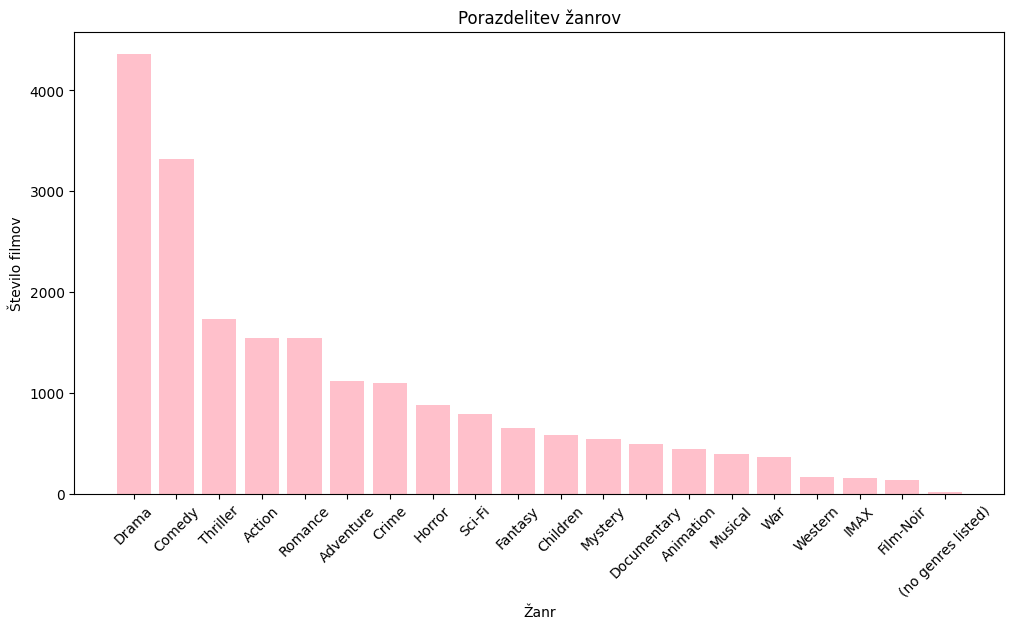

In [7]:
sez_zanrov = [zanr for vsi_zanri in movies["genres"] for zanr in vsi_zanri.split("|")]

pojavitve = pd.Series(sez_zanrov).value_counts()

plt.figure(figsize=(12, 6))
plt.bar(pojavitve.index, pojavitve.values, color="pink")
plt.xlabel("Žanr")
plt.ylabel("Število filmov")
plt.title("Porazdelitev žanrov")
plt.xticks(rotation=45)
plt.show();

Iz grafa je razvidno, da je **Drama** najpogostejsi zanr, saj ima najvec filmov, sledijo **Comedy**, **Thriller**, **Action** in **Romance**. To nakazuje, da so ti zanri najpogosteje zastopani v zbirki in verjetno tudi bolj priljubljeni pri gledalcih. Manj pogosti zanri, kot so **Film-Noir, IMAX** in **Western**, imajo bistveno manj filmov, kar lahko pomeni, da gre za nise ali specificne kategorije filmov. Ta vizualizacija lepo prikaze, kateri zanri so najpogosteje prisotni in kateri so bolj redki v podatkovni zbirki.

#### 3. vprašanje (20%):
Število ocen (ogledov) se za posamezni film razlikuje. Ali
obstaja povezava med gledanostjo in povprečno oceno filma? Opišite postopek, ki
ste ga uporabili pri odgovarjanju na vprašanje.

Kodo lahko razdelite v več celic.

         povprecna_ocena  stevilo_ocen
movieId                               
1               3.872470           247
2               3.401869           107
3               3.161017            59
4               2.384615            13
5               3.267857            56


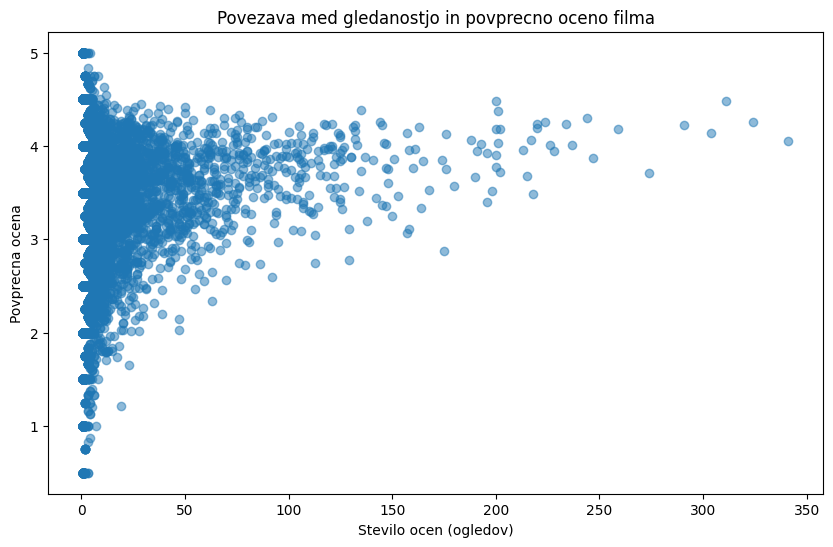

Pearsonov koeficient korelacije: 0.13082726621823262


In [8]:
podatki = povprecne_ocene.copy()
print(podatki.head())

plt.figure(figsize=(10, 6))
plt.scatter(podatki["stevilo_ocen"], podatki["povprecna_ocena"], alpha=0.5)

plt.xlabel("Stevilo ocen (ogledov)")
plt.ylabel("Povprecna ocena")
plt.title("Povezava med gledanostjo in povprecno oceno filma")
plt.show()

korelacija = podatki["stevilo_ocen"].corr(podatki["povprecna_ocena"])
print("Pearsonov koeficient korelacije:", korelacija)


Najprej sem izracunala povprecne ocene filmov in stevilo ocen za vsak film. Nato sem narisala scatter plot, kjer sem na x-os dala stevilo ocen, na y-os pa povprecno oceno, da bi videla, ali obstaja povezava. Za bolj natancen rezultat sem izracunala Pearsonov korelacijski koeficient. Ce je blizu 1, to pomeni, da imajo bolj gledani filmi visje ocene. Ce je blizu 0, ni povezave med gledanostjo in oceno. Ce je negativen, to pomeni, da bolj gledani filmi pogosto dobijo nizje ocene. To mi pomaga razumeti, ali gledanost vpliva na povprecno oceno in ali obstaja kaksen vzorec v podatkih.

#### 4. vprašanje (30%):
Vsaka ocena je bila vnešena na določen datum (stolpec
*timestamp*).  Ali se popularnost posameznih filmov s časom spreminja?
Problem reši tako, da za dani film ocene razporediš po času ter v vsaku časovni
točki izračunaš povprečje za zadnjih 30, 50, ali 100 ocen. Nariši graf, kako se
ocena spreminja in ga prikaži za dva zanimiva primera filmov.

Kodo lahko razdelite v več celic.

In [9]:
ratings["timestamp"] = pd.to_datetime(ratings["timestamp"], unit="s")

In [10]:
film_id = 1193
film_ime = movies[movies["movieId"] == film_id]["title"].values[0]
film_ocene = ratings[ratings["movieId"] == film_id].sort_values("timestamp")

film_ocene["30"] = film_ocene["rating"].rolling(window=30).mean()
film_ocene["50"] = film_ocene["rating"].rolling(window=50).mean()
film_ocene["100"] = film_ocene["rating"].rolling(window=100).mean()

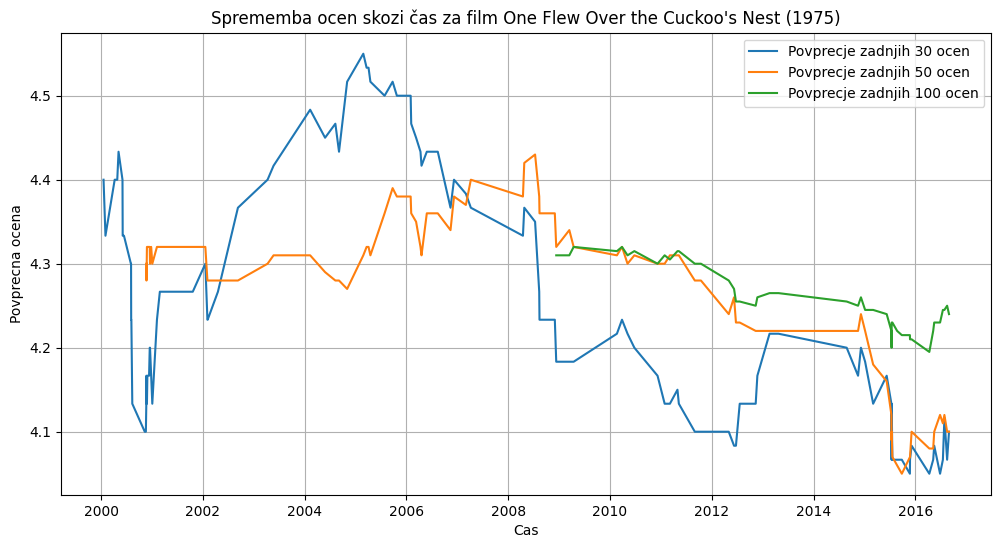

In [11]:
plt.figure(figsize=(12, 6))

plt.plot(film_ocene["timestamp"], film_ocene["30"], label="Povprecje zadnjih 30 ocen")
plt.plot(film_ocene["timestamp"], film_ocene["50"], label="Povprecje zadnjih 50 ocen")
plt.plot(film_ocene["timestamp"], film_ocene["100"], label="Povprecje zadnjih 100 ocen")

plt.xlabel("Cas")
plt.ylabel("Povprecna ocena")
plt.title("Sprememba ocen skozi čas za film " + film_ime)
plt.legend()
plt.grid()
plt.show()

In [12]:
film_id = 296
film_ime = movies[movies["movieId"] == film_id]["title"].values[0]
film_ocene = ratings[ratings["movieId"] == film_id].sort_values("timestamp")

film_ocene["30"] = film_ocene["rating"].rolling(window=30).mean()
film_ocene["50"] = film_ocene["rating"].rolling(window=50).mean()
film_ocene["100"] = film_ocene["rating"].rolling(window=100).mean()

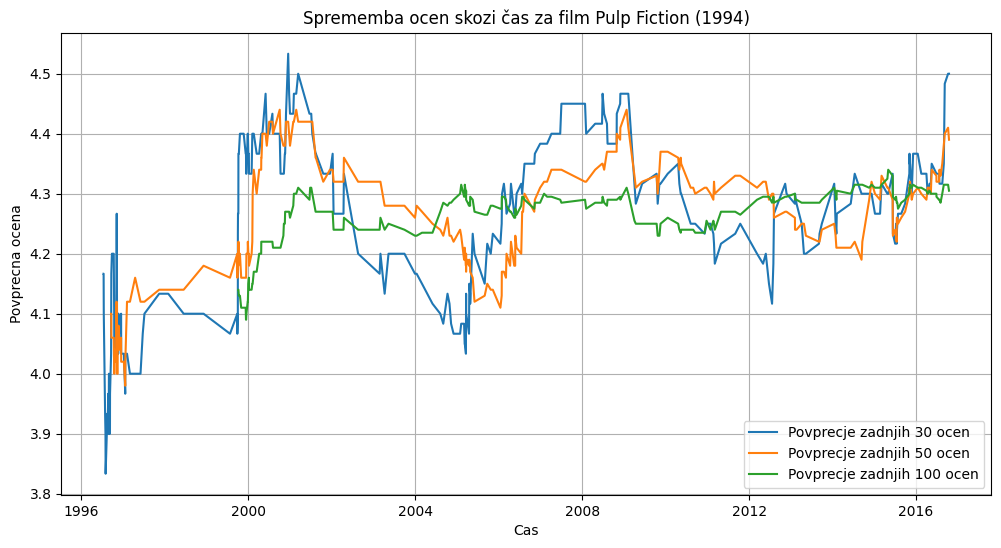

In [13]:
plt.figure(figsize=(12, 6))

plt.plot(film_ocene["timestamp"], film_ocene["30"], label="Povprecje zadnjih 30 ocen")
plt.plot(film_ocene["timestamp"], film_ocene["50"], label="Povprecje zadnjih 50 ocen")
plt.plot(film_ocene["timestamp"], film_ocene["100"], label="Povprecje zadnjih 100 ocen")

plt.xlabel("Cas")
plt.ylabel("Povprecna ocena")
plt.title("Sprememba ocen skozi čas za film " + film_ime)
plt.legend()
plt.grid()
plt.show()

Za ugotavljanje, ali se popularnost filma spreminja skozi cas, sem analizirala ocene filmov glede na datum vnosa. Najprej sem podatke uredila po casu, nato pa za vsak film izracunala tekoce povprecje zadnjih 30, 50 in 100 ocen. Tako sem dobila bolj gladko krivuljo, ki prikazuje, kako so se ocene spreminjale. Ce se krivulja dviga, to pomeni, da je film s casom pridobil boljse ocene. Ce pada, so se ocene z leti slabsale. Ce ostaja stabilna, to pomeni, da film skozi cas ohranja podobno oceno. Ta analiza mi pomaga razumeti, kako se mnenje gledalcev spreminja skozi leta.  

Analizo sem izvedla za dva kultna filma – *Pulp Fiction (1994)* in *One Flew Over the Cuckoo’s Nest (1975)*. Pri *Pulp Fiction* opazim, da so se ocene s casom nekoliko dvignile, kar nakazuje, da film pridobiva na vrednosti med gledalci. Pri *One Flew Over the Cuckoo’s Nest* pa vidim trend padanja ocen, kar pomeni, da film skozi leta dobiva nekoliko nizje ocene, mogoce zaradi spremenjenih preferenc novejsih generacij gledalcev. Vizualizacija lepo pokaze, kako se dojemanje filmov lahko spreminja skozi cas.

#### 5. vprašanje (20%):
Kako bi ocenili popularnost posameznih igralcev? Opišite postopek
ocenitve ter izpišite 10 najbolj popularnih igralcev.

Kodo lahko razdelite v več celic.

#### Bonus vprašanje (5%):

Kateri je tvoj najljubši film? Zakaj?

Moj najljubši film je The Lord of the Rings trilogija, a če bi morala izbrati samo enega, bi bil to The Fellowship of the Ring. Ta film postavi temelje celotne zgodbe in me vsakič znova popolnoma potegne vase s svojo čarobnostjo, pustolovščino in epskim svetom Srednjega sveta.



### Zapiski
Za nalaganje podatkov lahko uporabite modul `csv`.

In [14]:
from csv import DictReader

reader = DictReader(open('podatki/ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
for row in reader:
    user = row["userId"]
    movie = row["movieId"]
    rating = row["rating"]
    timestamp = row["timestamp"]

Podatki v zadnji vrstici datoteke:

In [15]:
user, movie, rating, timestamp

('671', '6565', '3.5', '1074784724')

Pretvorba časovnega formata (*Unix time*). Kode za oblikovanje so navedene v dokumentaciji modula [`datetime`](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [16]:
from datetime import datetime

t = 1217897793 # Unix-time
ts = datetime.fromtimestamp(t).strftime('%Y-%m-%d %H:%M')
ts

'2008-08-05 02:56'